In [1]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'
static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
static_features = ["new_" + feature for feature in static_features]
time_features = ["new_" + feature for feature in time_features]
models = ["new_all_features"]  + static_features + time_features

# metric = "all_features"
# metric2 = "attack_path_exposure"
# metric3 = "overall_asr_avg"
# models = [
#     metric2,
#     f"{metric2}_CompleteTopologyShuffle",
#     f"{metric2}_IPShuffle",
#     f"{metric2}_OSDiversity",
#     f"{metric2}_ServiceDiversity"
# ] 



In [3]:
# radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
# schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
# print(schemes_data)
# radar.plot_n_schemes(schemes_data)

new_all_features
{'new_all_features': {'ASR': 1.5277777777777777, 'time_to_compromise': 1.531922746681428, 'attack_path_exposure': 2.440141676505314, 'ROA': 0.9520654400769294, 'risk': 1.0335315432245895}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


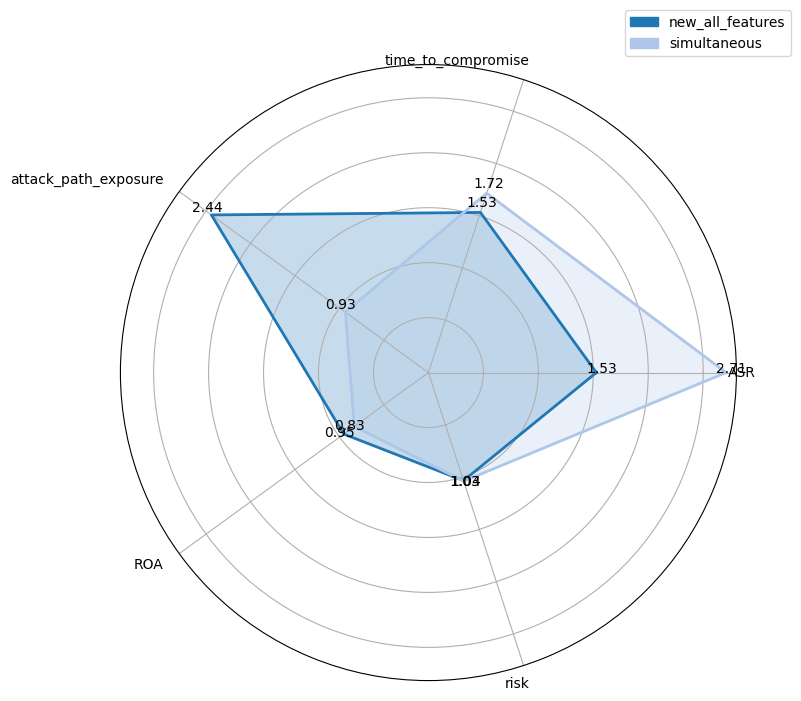

new_host_compromise_ratio
{'new_host_compromise_ratio': {'ASR': 1.5625, 'time_to_compromise': 1.539680296604147, 'attack_path_exposure': 2.481152460984394, 'ROA': 1.0131134479144928, 'risk': 0.9433001973954999}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


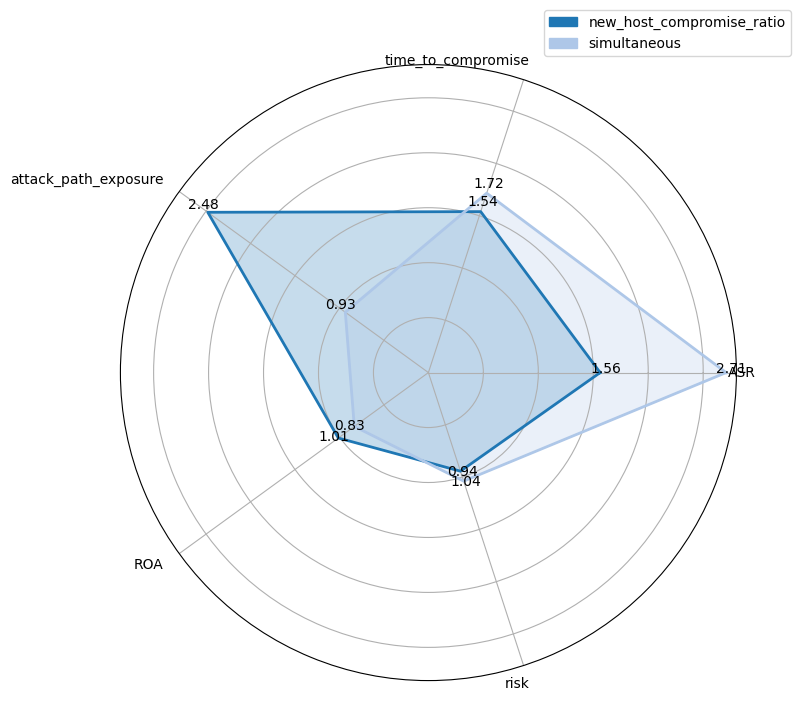

new_exposed_endpoints
{'new_exposed_endpoints': {'ASR': 1.5416666666666667, 'time_to_compromise': 1.5109975828996915, 'attack_path_exposure': 2.5096229737113727, 'ROA': 1.0784328931059721, 'risk': 1.0299590278085207}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


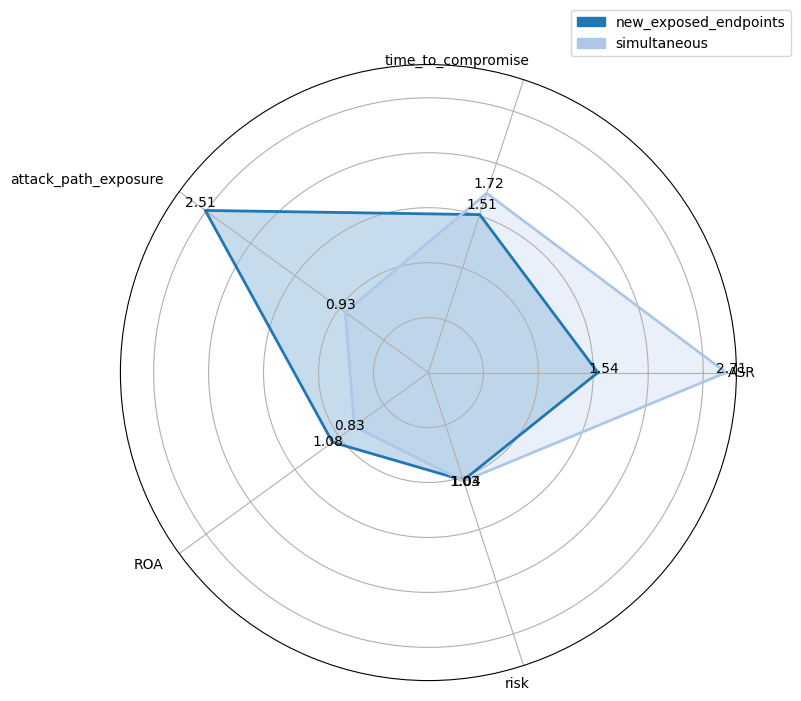

new_attack_path_exposure
{'new_attack_path_exposure': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.5063780644714029, 'attack_path_exposure': 2.4555310238309764, 'ROA': 1.0333481546189387, 'risk': 1.1068786725220814}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


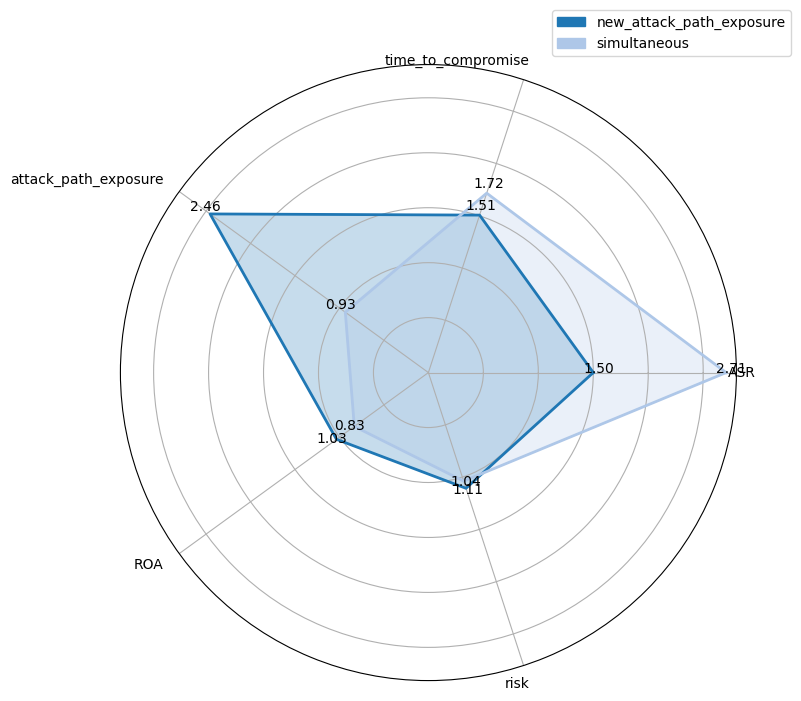

new_overall_asr_avg
{'new_overall_asr_avg': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.5129305332988305, 'attack_path_exposure': 2.460476190476191, 'ROA': 1.109598195523882, 'risk': 1.0586358150071877}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


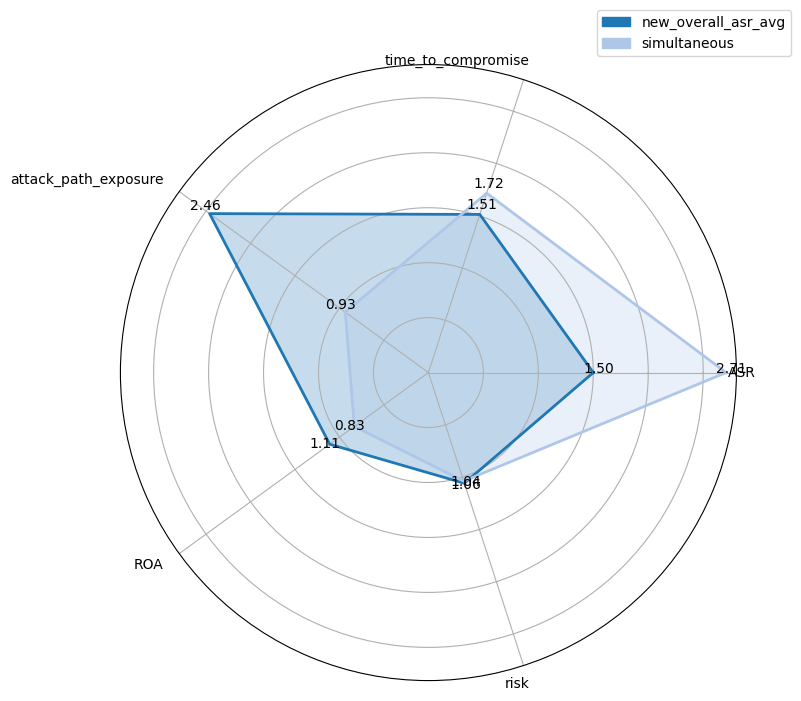

new_roa
{'new_roa': {'ASR': 1.5555555555555554, 'time_to_compromise': 1.5413975876308805, 'attack_path_exposure': 2.4300999412110524, 'ROA': 1.0231162381776955, 'risk': 0.9689387067025267}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


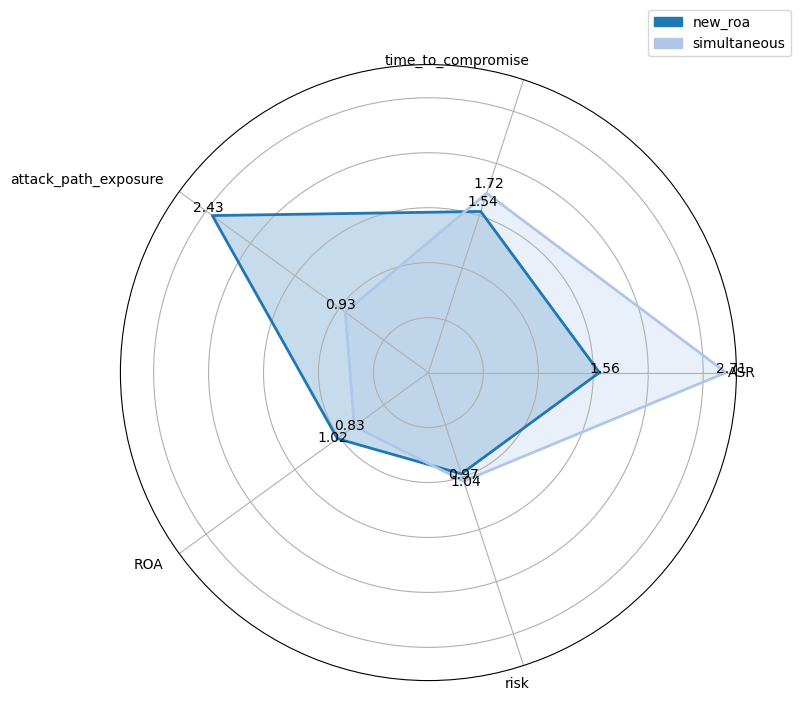

new_shortest_path_variability
{'new_shortest_path_variability': {'ASR': 1.5416666666666667, 'time_to_compromise': 1.542883984278316, 'attack_path_exposure': 2.4742218675179584, 'ROA': 1.133193129314283, 'risk': 1.055137570759392}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


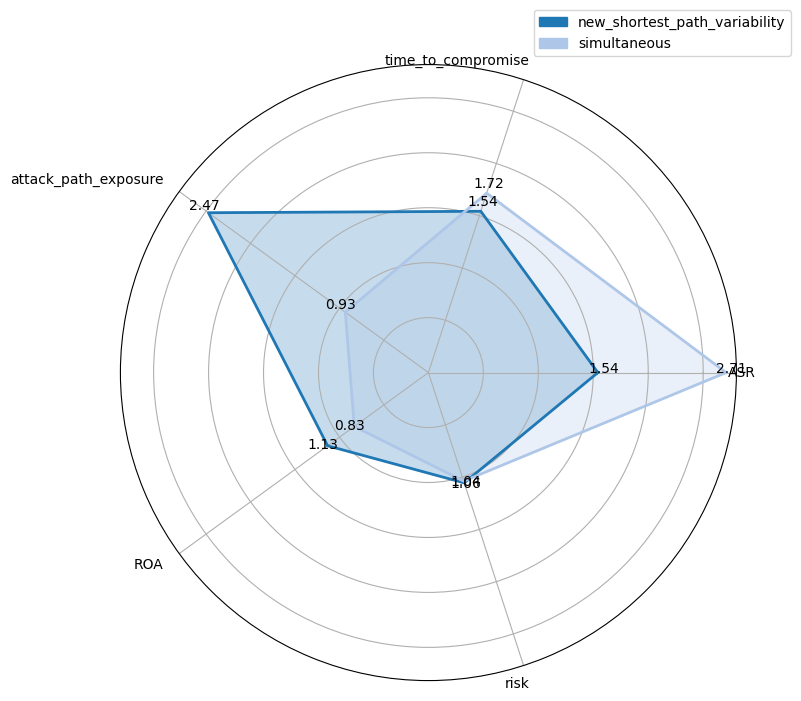

new_risk
{'new_risk': {'ASR': 1.5305505142165758, 'time_to_compromise': 1.5370733870440587, 'attack_path_exposure': 2.4718052980924496, 'ROA': 1.1130087177565442, 'risk': 1.059264054450655}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


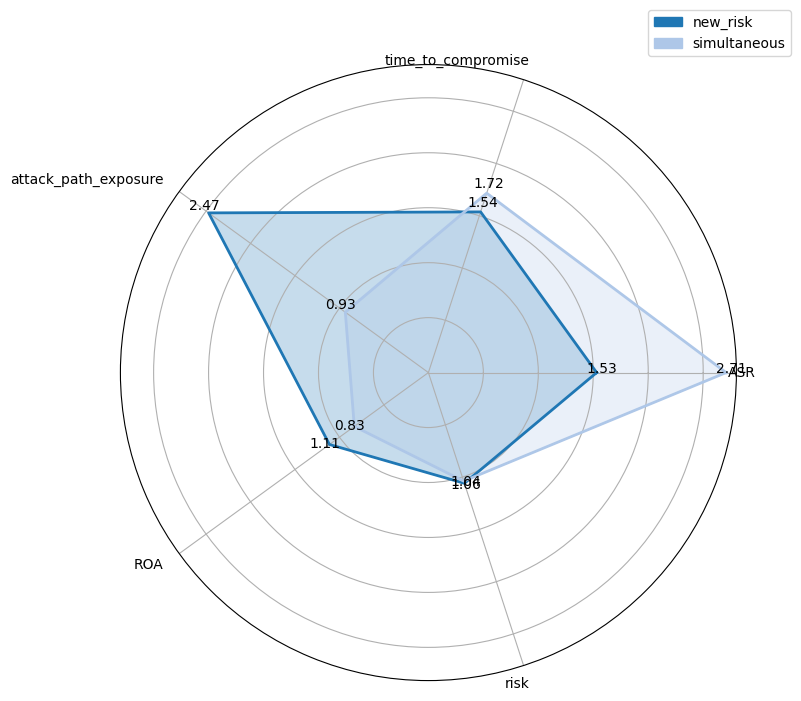

new_mtd_freq
{'new_mtd_freq': {'ASR': 1.5277777777777777, 'time_to_compromise': 1.536934949608704, 'attack_path_exposure': 2.4351104565537565, 'ROA': 0.9424896532687255, 'risk': 1.024824028055648}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


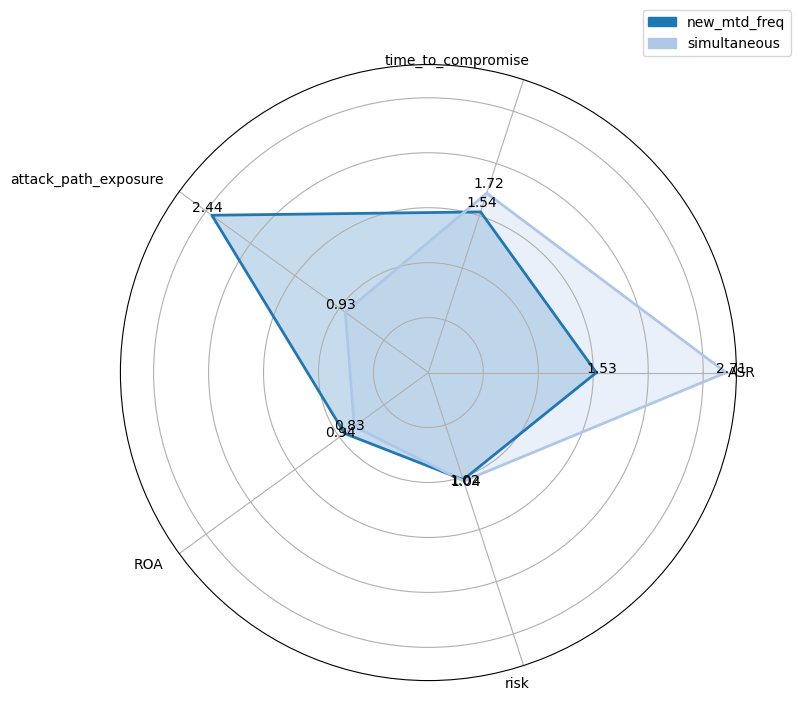

new_overall_mttc_avg
{'new_overall_mttc_avg': {'ASR': 1.5277777777777777, 'time_to_compromise': 1.533647954334496, 'attack_path_exposure': 2.4441816461684023, 'ROA': 1.1875257908405226, 'risk': 1.1337344448044822}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


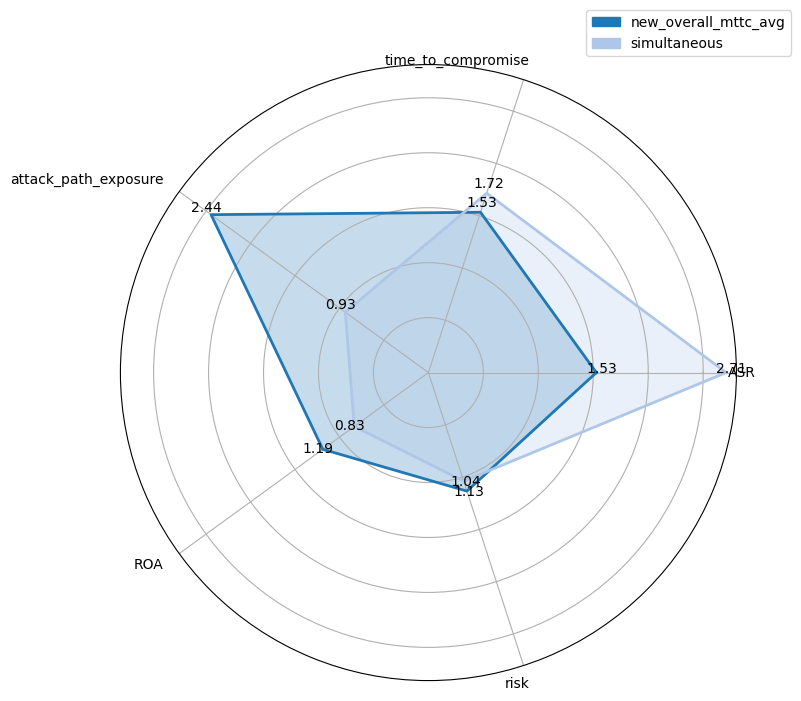

new_time_since_last_mtd
{'new_time_since_last_mtd': {'ASR': 1.5277777777777777, 'time_to_compromise': 1.5214097462924385, 'attack_path_exposure': 2.460476190476191, 'ROA': 0.9242463393517293, 'risk': 1.0268214541847807}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


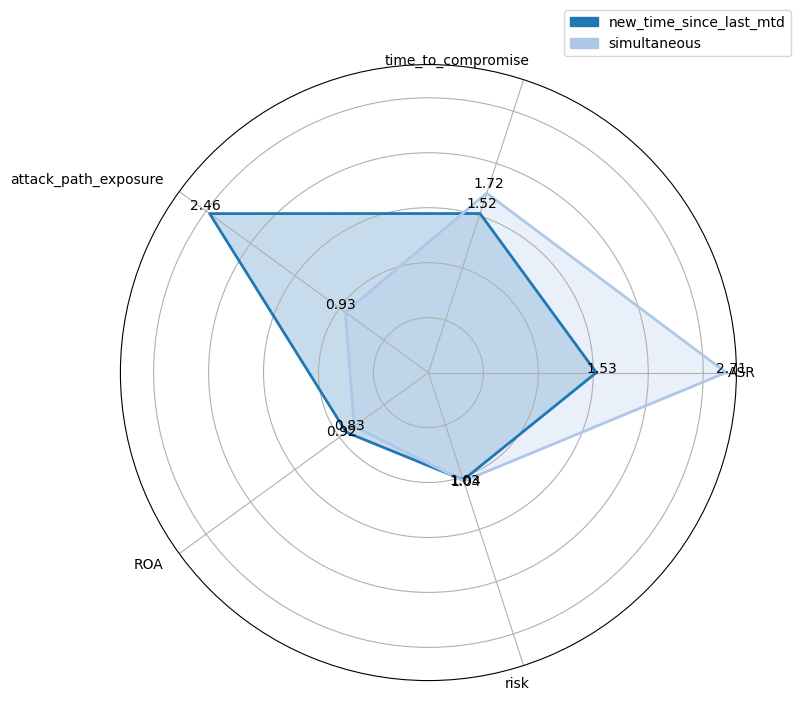

In [4]:
for model in models:

    print(model)
    radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
    schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
    # schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, 'random', 'alternative', "simultaneous"],run_trial = False)).to_dict()
    print(schemes_data)
    radar.plot_n_schemes(schemes_data)
 

{'new_all_features': {'ASR': 1.5277777777777777, 'time_to_compromise': 1.531922746681428, 'attack_path_exposure': 2.440141676505314, 'ROA': 0.9520654400769294, 'risk': 1.0335315432245895}, 'new_host_compromise_ratio': {'ASR': 1.5625, 'time_to_compromise': 1.539680296604147, 'attack_path_exposure': 2.481152460984394, 'ROA': 1.0131134479144928, 'risk': 0.9433001973954999}, 'new_exposed_endpoints': {'ASR': 1.5416666666666667, 'time_to_compromise': 1.5109975828996915, 'attack_path_exposure': 2.5096229737113727, 'ROA': 1.0784328931059721, 'risk': 1.0299590278085207}, 'new_attack_path_exposure': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.5063780644714029, 'attack_path_exposure': 2.4555310238309764, 'ROA': 1.0333481546189387, 'risk': 1.1068786725220814}, 'new_overall_asr_avg': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.5129305332988305, 'attack_path_exposure': 2.460476190476191, 'ROA': 1.109598195523882, 'risk': 1.0586358150071877}, 'new_roa': {'ASR': 1.5555555555555554, 'ti

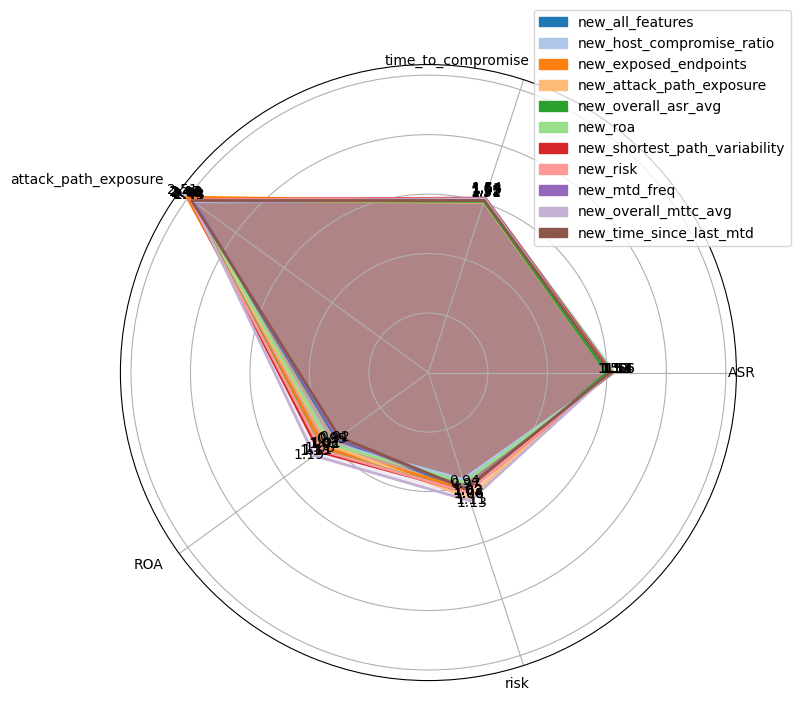

In [5]:

radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "overview", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(models,run_trial = False)).T.drop(columns=[ 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", "shortest_path_variability", "MEF"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [6]:
# import pandas as pd
# from tabulate import tabulate

# # Define the data for the table with full feature names
# data = {
#     "Metric v.s. MTD": [
#         "All features",
#         "Host Compromise Ratio (HCR)",
#         "Exposed Endpoints (EE)",
#         "Attack Path Exposure (APE)",
#         "Attack Success Rate (ASR)",
#         "Return on Attack (ROA)",
#         "Shortest Path Variability (SPV)",
#         "Risk (RISK)",
#         "MTD Execution Time (MEF)",
#         "Mean Time to Compromise (MTTC)",
#         "Time Since Last MTD (TSLM)"
#     ],
#     "All MTD": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
#     "CompleteTopologyShuffle": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
#     "IPShuffle": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
#     "OSDiversity": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
#     "ServiceDiversity": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"]
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Print the table
# print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


In [7]:
models

['new_all_features',
 'new_host_compromise_ratio',
 'new_exposed_endpoints',
 'new_attack_path_exposure',
 'new_overall_asr_avg',
 'new_roa',
 'new_shortest_path_variability',
 'new_risk',
 'new_mtd_freq',
 'new_overall_mttc_avg',
 'new_time_since_last_mtd']

Normalized Weighted Metrics for Each Scheme:
new_all_features                 7.485439
new_host_compromise_ratio        7.539746
new_exposed_endpoints            7.670679
new_attack_path_exposure         7.602136
new_overall_asr_avg              7.641641
new_roa                          7.519108
new_shortest_path_variability    7.747103
new_risk                         7.711702
new_mtd_freq                     7.467137
new_overall_mttc_avg             7.826868
new_time_since_last_mtd          7.460732
Name: sum, dtype: float64


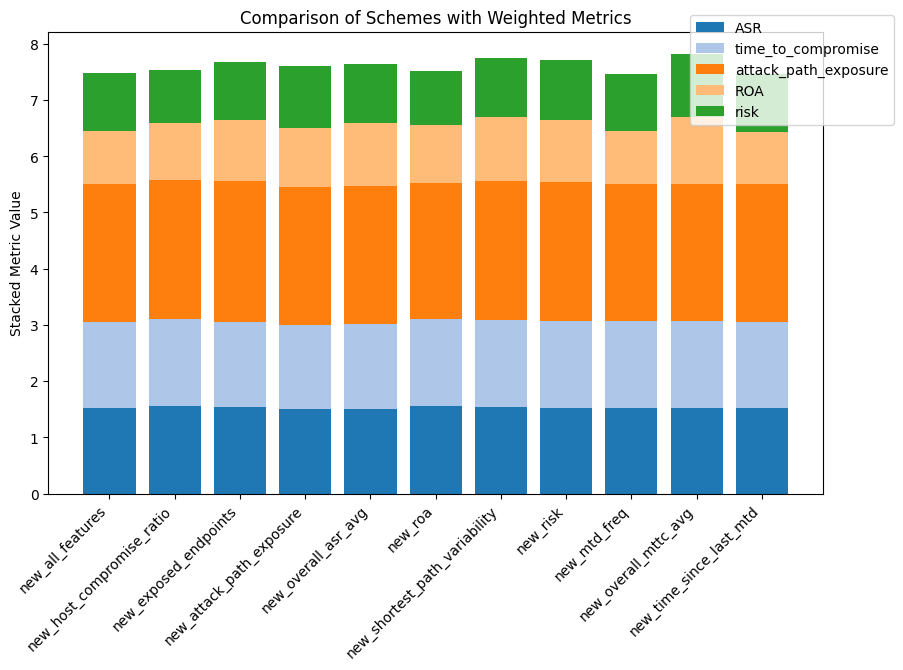

In [8]:
from stacked_plots import StackedBarChart

# Initialize and plot
chart = StackedBarChart(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "Overview", trial, result_head_path)
weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
chart.plot_n_schemes(schemes_data, weights)

In [9]:
chart.weighted_data

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
new_all_features,1.527778,1.531923,2.440142,0.952065,1.033532,7.485439,-0.981899,0.067482
new_host_compromise_ratio,1.562500,1.539680,2.481152,1.013113,0.943300,7.539746,-0.541686,0.215807
new_exposed_endpoints,1.541667,1.510998,2.509623,1.078433,1.029959,7.670679,0.519652,0.573414
new_attack_path_exposure,1.500000,1.506378,2.455531,1.033348,1.106879,7.602136,-0.035958,0.386207
new_overall_asr_avg,1.500000,1.512931,2.460476,1.109598,1.058636,7.641641,0.284267,0.494104
new_roa,1.555556,1.541398,2.430100,1.023116,0.968939,7.519108,-0.708980,0.159439
new_shortest_path_variability,1.541667,1.542884,2.474222,1.133193,1.055138,7.747103,1.139144,0.782146
new_risk,1.530551,1.537073,2.471805,1.113009,1.059264,7.711702,0.852182,0.685457
new_mtd_freq,1.527778,1.536935,2.435110,0.942490,1.024824,7.467137,-1.130257,0.017494
new_overall_mttc_avg,1.527778,1.533648,2.444182,1.187526,1.133734,7.826868,1.785712,1.000000


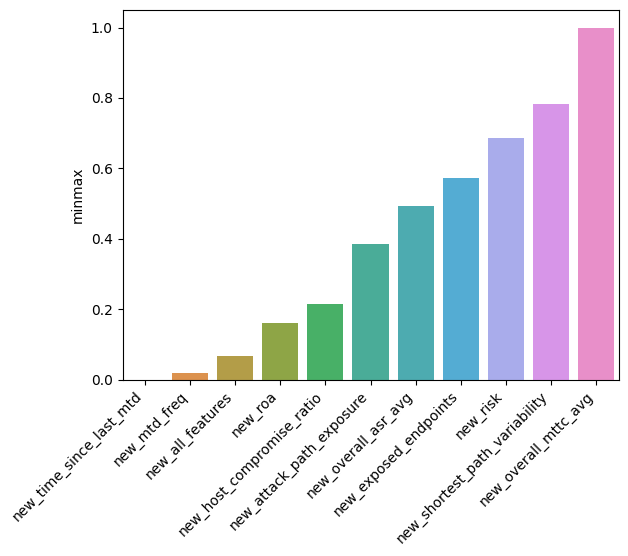

In [10]:
chart.normalized_chart("minmax")
